# Shot Quality Technical Assessment 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read 
df = pd.read_csv('nba_data_modeling_engineer.csv')

## Descriptions of Columns

- Columns numbered for event instances in the game 

## List of Event Messages 

- 1 : Made shot
    - namePlayer1 : Took shot 
    - namePlayer2: Assisted Shot 
- 2: Missed Shot 
- 3: Free Throw 
- 4: Rebound 
- 5: Turnover 
- 6: Foul 
- 7: Violation 
- 8: Substitution 
- 9: Timeout 
- 10: Jumpball
- 11: Ejection 
- 12: Start of Period 
- 13: End of Period 



## Question 1: KD is traded for a top-55 protected 2nd round pick

Initially I was thinking how would it look to see Kevin Durant on the Warriors after the 2023-2024 season, where he makes his return to the Warriors to reclaim another title for Stephen Curry following the departure of Klay Thompson, 
however after realizing this data set was set in 2021-22, the year the Warriors won, I figured it would be pretty uninteresting to see those effects. So as a New York native, let me annoy the public and make KD switch NY alliances, Kevin Durant to the New York Knicks.

The New York Knicks in the 2021-2022 season saw a roster, that for the first time in a long time, had some potential to make something happen in the league, however that something to happen wouldnt amount to anymore than some playoff wins. But what if they were able to bring someone in like KD to be that player they could rely on, takeover the big moments, and become the difference in their championship dreams.

Thought Process:
To begin, I need prepare my data for further analysis on how Kevin Durant would affect the new lineup he would be getting into, 
the players that made up the Knicks most common starting 5 was Rj Barrett, Evan Fournier, Alec Burks, Julius Randle and Mitchell Robinson. 
There are a few other players that made the mix where there was a 5 with Kemba Walker, but the lineup stated before was the lineup that was most common 
(Basketball-Reference).

    so the starting five is:
    - PG: Evan Fournier
    - SG: RJ Barrett:
    - SF: Kevin Durant
    - PF: Julius Randle
    - C: Mitchell Robinson

    and the existing starting five on the Brooklyn Nets is:
    - PG: James Harden
    - SG: Kyrie Irving
    - SF: Bruce Brown
    - PF: Kevin Durant 
    - C: LaMarcus Aldridge 

In approaching this problem, its going to be really interesting to see how the usage of KD is going to impact the Knicks, Randle was definitely the go to guy in big moments and was an all star in 2021, 2023 and 2024 so with KD on the team, would Randle have been an all star? Will the Knicks benefit in the welcoming of a super star? And how would it affect the scoring dynamic of the starting five? Lets find out 

## Data Cleaning and Filtering 

- Since I was working with the Knicks and Nets, I first needed to filter for just these two teams as the rest of the league meant nothing to the dynamic of how Kevin Durant impacted his team and how he would impact his future team.
- Then I needed to search for rows that included scoring information, so information like the jumpball or the end of a period don't have any relevance to the ppg of each player.
- Based on the descriptions listed in the documentation, I limited the rows to numberEventMessageType of 1 or 3 but with 3 (which represents Free throws) you further need to filter out the misses by looking at the description
    


In [16]:
# Read the full CSV into a DataFrame
df = pd.read_csv("nba_data_modeling_engineer.csv")

# Step 1: Filter for Knicks (NYK) and Nets (BKN) data using boolean indexing
mask_teams = df.filter(like='TeamPlayer1', axis=1).apply(lambda x: x.astype(str).str.contains('NYK|BKN', na=False, case=False)).any(axis=1)
filtered_df = df[mask_teams]

# Step 2: Filter for shooting (EventMessageType == 1) and free throw (EventMessageType == 3) events
mask_shoot_events = filtered_df['numberEventMessageType'].isin([1, 3])
filter_shot_events = filtered_df[mask_shoot_events]

# Step 3: Filter out missed shots and missed free throws by checking description columns using boolean indexing
description_columns = filter_shot_events.filter(like='description', axis=1)

# Remove rows where any 'description' column contains 'MISS'
mask_missed = ~description_columns.apply(lambda x: x.astype(str).str.contains('MISS', na=False, case=False)).any(axis=1)
final_filtered_df = filter_shot_events[mask_missed]

Given I have a list of only knicks and nets shooting data, I now want to conduct some analysis on the Nets more specifically, as I want to see how players played on the court with KD and off the court 

First I need to generate a list of players that were on the Nets roster throughout the 2021-22 season 
Second I need to figure out what games KD played and didnt play 


In [17]:
nets_df = final_filtered_df[df["slugTeamPlayer1"] == 'BKN']
list_of_nets_players = nets_df[["idPlayerNBA1", "namePlayer1"]].drop_duplicates()
nets_players_list = list_of_nets_players.itertuples(index=False, name=None)
print(list_of_nets_players)

        idPlayerNBA1         namePlayer1
2583          203925          Joe Harris
2802         1627761     DeAndre' Bembry
2888          201142        Kevin Durant
2912          200746   LaMarcus Aldridge
3209         1630556     Kessler Edwards
3239         1629651         Nic Claxton
3387          201949       James Johnson
3639          201988         Patty Mills
3650          203552          Seth Curry
3675          203083      Andre Drummond
3733          201933       Blake Griffin
4180         1628971         Bruce Brown
4461          202681        Kyrie Irving
5588         1630549      Day'Ron Sharpe
6533          201935        James Harden
8211         1630560          Cam Thomas
10422        1630561      David Duke Jr.
12010         201609        Goran Dragic
57086        1628975        Jevon Carter
72590         200794        Paul Millsap
109911        204038   Langston Galloway
157881       1627885  Shaquille Harrison
386661        203516     James Ennis III


This is the result from the above filtering 
Now we need to understand how these players played when KD was playing vs KD wasn't playing, this is because KD takes away not only shots from other people but also playing time so understanding his impact to the team strategy dynamic is crucial 




In [18]:
games_nets_df = nets_df['idGame'].is_unique
kd_name = "Kevin Durant"
kd_id = 201142

# DataFrame with only Kevin Durant's games
kd_games_df = nets_df[nets_df["idPlayerNBA1"] == kd_id]

# DataFrame without Kevin Durant's games
no_kd_games_df = nets_df[nets_df["idPlayerNBA1"] != kd_id]

# Optionally, check unique game IDs for both cases
games_nets_df = nets_df["idGame"].unique()
games_with_kd = kd_games_df["idGame"].unique()  # All games where KD played
games_without_kd = set(games_nets_df) - set(games_with_kd)

# Print some information
print(f"Games with Kevin Durant: {games_with_kd}")
print(f"Games without Kevin Durant: {games_without_kd}")
print(f"Number of Games with Kevin Durant: {len(games_with_kd)}")
print(f"Number of Games without Kevin Durant: {len(games_without_kd)}")

Games with Kevin Durant: [22100429 22101048 22100644 22100072 22100148 22100216 22100571 22101191
 22100196 22101030 22100253 22100993 22101036 22101163 22100044 22100602
 22101075 22100486 22100960 22100210 22100092 22101089 22101012 22100021
 22100270 22100542 22100583 22101133 22100363 22100625 22100179 22100159
 22100975 22101111 22100001 22100124 22100384 22100035 22100139 22100057
 22100413 22100113 22100554 22100525 22100941 22100343 22100294 22100336
 22101120 22101148 22101205 22100399 22101180 22100314 22101216]
Games without Kevin Durant: {22100233, 22100491, 22100877, 22100750, 22100372, 22100630, 22100890, 22100507, 22100772, 22100780, 22100910, 22100657, 22100793, 22100669, 22100928, 22100804, 22100817, 22100691, 22100442, 22100832, 22100706, 22100453, 22100718, 22100464, 22100851, 22100726, 22100859}
Number of Games with Kevin Durant: 55
Number of Games without Kevin Durant: 27


This means that KD only played in 55 of 82 games, well only is a difficult statement, but lets see how his teammates played in these games vs how they played with KD, we will only analyze how their points per game was as that is the objective of this task is to predict the points per game of the starting 5 


In [19]:
ppg_with_kd = {}
ppg_without_kd = {}

kd_game_ids_set = set(games_with_kd)
no_kd_game_ids_set = set(games_without_kd)

kd_games_df_with_all_players = nets_df[nets_df["idGame"].isin(kd_game_ids_set)]
no_kd_games_df_with_all_players = nets_df[nets_df["idGame"].isin(no_kd_game_ids_set)]


# Calculate PPG for each player in games with Kevin Durant
for player_id, player_name in list_of_nets_players.itertuples(index=False, name=None):
    player_games = kd_games_df_with_all_players[
        kd_games_df_with_all_players["idPlayerNBA1"] == player_id
    ]
    total_points = player_games["shotPtsHome"].sum() + player_games["shotPtsAway"].sum()
    games_played = player_games["idGame"].nunique()  # Unique games played by the player
    ppg_with_kd[player_name] = total_points / games_played if games_played > 0 else 0

# Calculate PPG for each player in games without Kevin Durant
for player_id, player_name in list_of_nets_players.itertuples(index=False, name=None):
    player_games_no_kd = no_kd_games_df_with_all_players[
        no_kd_games_df_with_all_players["idPlayerNBA1"] == player_id
    ]
    total_points_no_kd = (
        player_games_no_kd["shotPtsHome"].sum()
        + player_games_no_kd["shotPtsAway"].sum()
    )
    games_played_no_kd = player_games_no_kd[
        "idGame"
    ].nunique()  # Unique games played by the player
    ppg_without_kd[player_name] = (
        total_points_no_kd / games_played_no_kd if games_played_no_kd > 0 else 0
    )


# Step 3: Create a Comparison DataFrame
comparison_df = pd.DataFrame(
    {
        "Player": list(ppg_with_kd.keys()),  # Player names
        "PPG with KD": list(ppg_with_kd.values()),  # PPG with KD
        "PPG without KD": list(ppg_without_kd.values()),  # PPG without KD
    }
)

# Calculate Change in PPG
comparison_df["Change in PPG"] = (
    comparison_df["PPG with KD"] - comparison_df["PPG without KD"]
)



To begin this analysis, its very very interesting to see that over the course of the 2021-22 season, Joe Harris has only played minutes when KD is on the court, But when referencing Basketball Reference https://www.basketball-reference.com/teams/BRK/2022.html it seems hes only played 14 games in that 2021-22 season where he did start in every game that stint 

In comparing how players PPG is compared with KD, its interesting to see that Kyries PPG actually went down but then you can see that James Hardens PPG went up back 4.7 points which is understandable as if KD isn't taking the shot, James Harden most likely would. 

Some limits of this study here is that we are inferring that we don't know how much players played with KD with him on the floor, we could also further look into substitutions and player minutes but in light of the time limit of this project, we won't delve into that

In [20]:
# Total PPG with KD, Total without, and difference
total_ppg_with_kd = sum(
    value for player, value in ppg_with_kd.items() if player != "Kevin Durant"
)
# Calculate total PPG without KD
total_ppg_without_kd = sum(ppg_without_kd.values())
# Calculate the difference
total_change_in_ppg = total_ppg_with_kd - total_ppg_without_kd
# Append the totals to the comparison DataFrame
totals_df = pd.DataFrame(
    {
        "Player": ["Total"],
        "PPG with KD": [total_ppg_with_kd],
        "PPG without KD": [total_ppg_without_kd],
        "Change in PPG": [total_change_in_ppg],
    }
)
# Combine the comparison DataFrame with totals
final_comparison_df = pd.concat([comparison_df, totals_df], ignore_index=True)

# Display the final comparison DataFrame
print(final_comparison_df)

                Player  PPG with KD  PPG without KD  Change in PPG
0           Joe Harris    11.285714        0.000000      11.285714
1      DeAndre' Bembry     6.840000        7.133333      -0.293333
2         Kevin Durant    29.872727        0.000000      29.872727
3    LaMarcus Aldridge    13.000000       14.466667      -1.466667
4      Kessler Edwards     8.500000        7.705882       0.794118
5          Nic Claxton     8.942857        9.700000      -0.757143
6        James Johnson     4.580645        9.428571      -4.847926
7          Patty Mills    11.520000       13.346154      -1.826154
8           Seth Curry    14.454545       17.857143      -3.402597
9       Andre Drummond    12.388889        9.833333       2.555556
10       Blake Griffin     6.615385        8.904762      -2.289377
11         Bruce Brown    10.951220        7.920000       3.031220
12        Kyrie Irving    27.823529       26.916667       0.906863
13      Day'Ron Sharpe     6.857143        6.800000       0.05

First lets filter out players that only played in games with KD vs without such as Joe Harris, Shaquille Harrison, etc 



In [21]:
non_zero_players_comparison = comparison_df[(comparison_df["PPG with KD"] != 0) & (comparison_df["PPG without KD"] != 0)]
print(non_zero_players_comparison)

               Player  PPG with KD  PPG without KD  Change in PPG
1     DeAndre' Bembry     6.840000        7.133333      -0.293333
3   LaMarcus Aldridge    13.000000       14.466667      -1.466667
4     Kessler Edwards     8.500000        7.705882       0.794118
5         Nic Claxton     8.942857        9.700000      -0.757143
6       James Johnson     4.580645        9.428571      -4.847926
7         Patty Mills    11.520000       13.346154      -1.826154
8          Seth Curry    14.454545       17.857143      -3.402597
9      Andre Drummond    12.388889        9.833333       2.555556
10      Blake Griffin     6.615385        8.904762      -2.289377
11        Bruce Brown    10.951220        7.920000       3.031220
12       Kyrie Irving    27.823529       26.916667       0.906863
13     Day'Ron Sharpe     6.857143        6.800000       0.057143
14       James Harden    21.218750       25.916667      -4.697917
15         Cam Thomas     7.531250       14.304348      -6.773098
16     Dav

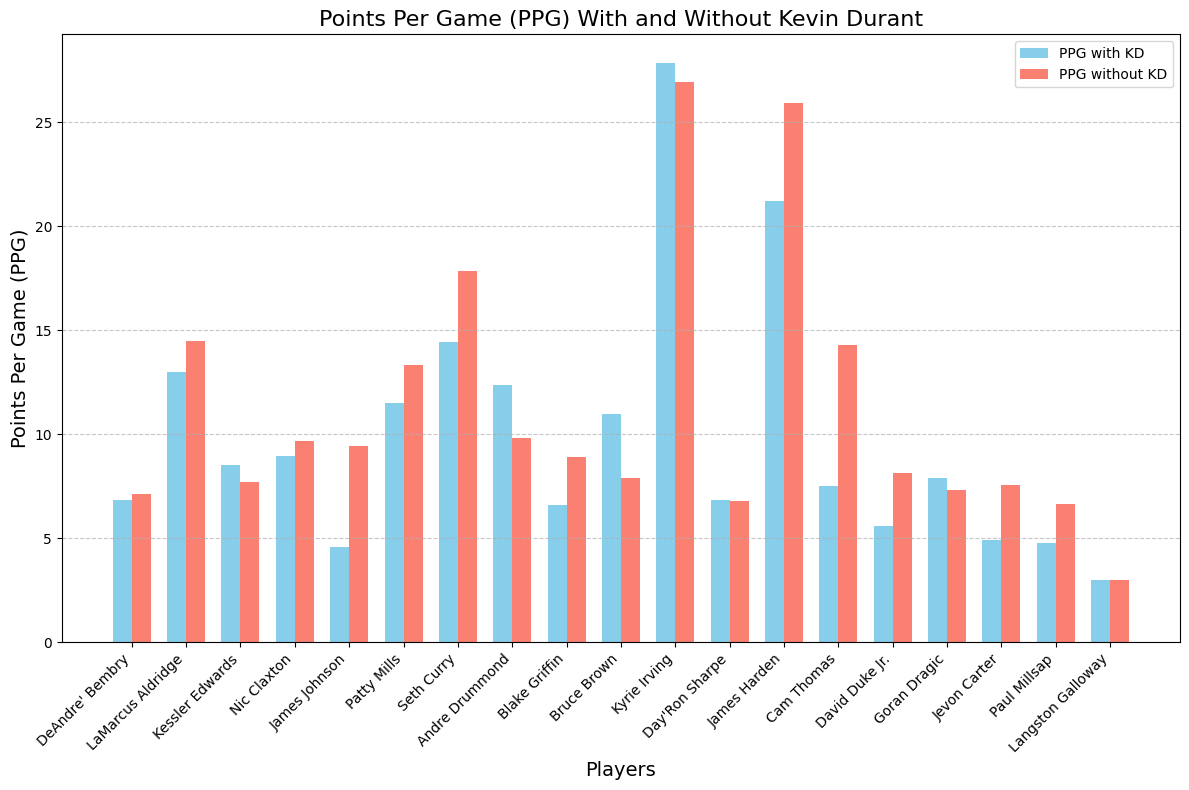

In [22]:
plt.figure(figsize=(12,8))

# Define the bar width and positions
bar_width = 0.35
x = np.arange(len(non_zero_players_comparison["Player"]))

# Create bars for PPG with and without KD
bars1 = plt.bar(
    x - bar_width / 2,
    non_zero_players_comparison["PPG with KD"],
    width=bar_width,
    label="PPG with KD",
    color="skyblue",
)
bars2 = plt.bar(
    x + bar_width / 2,
    non_zero_players_comparison["PPG without KD"],
    width=bar_width,
    label="PPG without KD",
    color="salmon",
)

# Add labels and title
plt.xlabel("Players", fontsize=14)
plt.ylabel("Points Per Game (PPG)", fontsize=14)
plt.title("Points Per Game (PPG) With and Without Kevin Durant", fontsize=16)
plt.xticks(x, non_zero_players_comparison["Player"], rotation=45, ha="right")
plt.legend()

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

now using this data, we can attempt to calculate the average difference in PPG across all players 

In [23]:
average_difference_ppg = non_zero_players_comparison["Change in PPG"].mean()
print(average_difference_ppg)

-1.3435256753120908


This means that when playing with KD, players on average saw an increase of 1.344 points per game, this introduces the least bias for our study here, but lets see the average PPG difference amongst the starting five stated earlier 

In [24]:
nets_starting_five = ["Kyrie Iriving", "James Harden", "Bruce Brown", "LaMarcus Aldridge"]
starting_five_comparison_df = non_zero_players_comparison[
    non_zero_players_comparison["Player"].isin(nets_starting_five)
]

# Calculate the average difference in PPG for the starting five players
average_difference_starting_five_ppg = starting_five_comparison_df[
    "Change in PPG"
].mean()
print(average_difference_starting_five_ppg)

-1.044454607046071


Lets now see the difference between each players PPG with and without KD and how far it deviates from the average points per game 




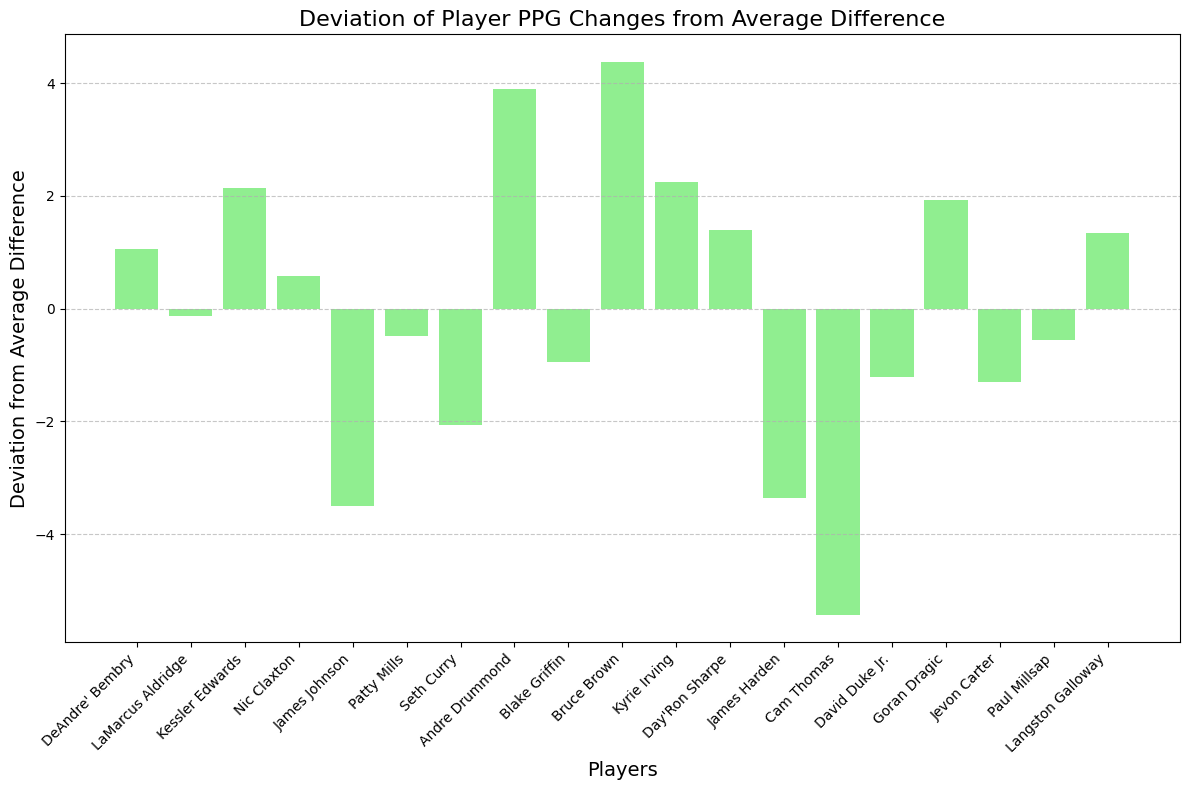

In [25]:
non_zero_players_comparison["Deviation from Avg"] = (
    non_zero_players_comparison["Change in PPG"] - average_difference_ppg
)

# Plotting the Deviation
plt.figure(figsize=(12, 8))

# Define bar positions
x = np.arange(len(non_zero_players_comparison["Player"]))

# Create bar chart for deviation
plt.bar(x, non_zero_players_comparison["Deviation from Avg"], color="lightgreen")

plt.xlabel("Players", fontsize=14)
plt.ylabel("Deviation from Average Difference", fontsize=14)
plt.title("Deviation of Player PPG Changes from Average Difference", fontsize=16)
plt.xticks(x, non_zero_players_comparison["Player"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In this graph, 
- Negative values mean that the players PPG increased in games without KD
- Positive values mean that the players PPG decreased in games with KD 

This would make sense as this was the first year from a basketball knowledge perspective where Cam Thomas was beginning to show his worth as an NBA player and really benefitted fro the absense of Kevin Durant 

# Lets go ahead and analyze the Knicks makeup
    As stated before the Knicks starting five would be 
    - Evan Fournier 
    - RJ Barrett 
    - Alec Burks 
    - Julius Randle 
    - Mitchell Robinson 

but lets see how the PPG looks across the full knicks roster before we delve into more information 

In [26]:
knicks_df = final_filtered_df[df["slugTeamPlayer1"] == "NYK"]
list_of_knicks_players = knicks_df[["idPlayerNBA1", "namePlayer1"]].drop_duplicates()
knicks_df_players_list = list_of_knicks_players.itertuples(index=False, name=None)
print(list_of_knicks_players)

        idPlayerNBA1        namePlayer1
2464          203944      Julius Randle
2539          202689       Kemba Walker
2773          203095      Evan Fournier
2828         1629628         RJ Barrett
2939          202692         Alec Burks
3393         1629011  Mitchell Robinson
5333          203457       Nerlens Noel
9154         1630167         Obi Toppin
10434        1630193  Immanuel Quickley
10942        1630579       Jericho Sims
18863         201565       Derrick Rose
21786        1629656     Quentin Grimes
32543         201959         Taj Gibson
96784        1629629        Cam Reddish
99525        1630540      Miles McBride
127087       1628995      Kevin Knox II
151755       1627782       Wayne Selden
364075       1627853   Ryan Arcidiacono
402689       1628422     Damyean Dotson


Here we have a list of all the Knicks players now lets see their points per game across a season 


In [27]:
# Calculate PPG for each player in the season
ppg_knicks = {}
knicks_starting_five = [
    "Evan Fournier",
    "RJ Barrett",
    "Alec Burks",
    "Julius Randle",
    "Mitchell Robinson",
]
for player_id, player_name in list_of_knicks_players.itertuples(index=False, name=None):
    player_games = knicks_df[knicks_df["idPlayerNBA1"] == player_id]
    total_points = player_games["shotPtsHome"].sum() + player_games["shotPtsAway"].sum()
    games_played = player_games["idGame"].nunique()  # Unique games played by the player
    ppg_knicks[player_name] = total_points / games_played if games_played > 0 else 0


ppg_knicks_df = pd.DataFrame(list(ppg_knicks.items()), columns=["Player", "PPG"])

ppg_knicks_df["PPG"] = ppg_knicks_df["PPG"].map("{:.2f}".format)


print("\nKnicks:\n", ppg_knicks_df)




Knicks:
                Player    PPG
0       Julius Randle  20.10
1        Kemba Walker  12.31
2       Evan Fournier  14.24
3          RJ Barrett  20.03
4          Alec Burks  12.10
5   Mitchell Robinson   8.71
6        Nerlens Noel   4.25
7          Obi Toppin   9.82
8   Immanuel Quickley  11.76
9        Jericho Sims   4.29
10       Derrick Rose  12.44
11     Quentin Grimes   8.09
12         Taj Gibson   5.72
13        Cam Reddish   6.07
14      Miles McBride   4.94
15      Kevin Knox II   6.71
16       Wayne Selden   5.00
17   Ryan Arcidiacono   4.00
18     Damyean Dotson   4.00


In [28]:
starting_five_knicks_comparison_df = ppg_knicks_df[
    ppg_knicks_df["Player"].isin(knicks_starting_five)
]

total_ppg_starting_five = starting_five_knicks_comparison_df["PPG"].astype(float).sum()

starting_five_knicks_comparison_df.loc[:, "Percentage of Total PPG"] = (
    starting_five_knicks_comparison_df["PPG"].astype(float) / total_ppg_starting_five
) * 100
print(starting_five_knicks_comparison_df)

              Player    PPG  Percentage of Total PPG
0      Julius Randle  20.10                26.735834
2      Evan Fournier  14.24                18.941208
3         RJ Barrett  20.03                26.642724
4         Alec Burks  12.10                16.094706
5  Mitchell Robinson   8.71                11.585528


Given the entrance of Kevin Durant as a guy we understand will be taking a large quantity of shot from the rest of the starting 5, and he would most likely directly slot in for a guy like Alec Burks and from the past analysis, I was able to conclude that on average Kevin Durant would take up on average 1.34 ppg from the whole roster and 1.044 ppg from the starting five specifically, so in attempt to encompass the most rounded analysis, I will average those values to determine the estimate of how Kevin Durant would affect this team

In [29]:
adjustment_factor = (average_difference_starting_five_ppg + average_difference_ppg) / 2

kd_ppg_taken_from_knicks = adjustment_factor * 5

print(kd_ppg_taken_from_knicks)


-5.969950705895403


Im predicting that given the percentages of scoring each player on the 2021-22 Knicks takes up and the total ppg KD will take from the starting 5, we can draw conclusions based on the combination of this data 

In [30]:
ppg_taken_by_kd = {}

for index, row in starting_five_knicks_comparison_df.iterrows():
    player_name = row["Player"]
    player_percentage = row["Percentage of Total PPG"]

    # Calculate the points taken from each player
    ppg_taken_by_kd[player_name] = (player_percentage / 100) * kd_ppg_taken_from_knicks

# Add the calculated values to the DataFrame
starting_five_knicks_comparison_df.loc[:, "PPG Taken by KD"] = (
    starting_five_knicks_comparison_df["Player"].map(ppg_taken_by_kd)
)

print(starting_five_knicks_comparison_df)

              Player    PPG  Percentage of Total PPG  PPG Taken by KD
0      Julius Randle  20.10                26.735834        -1.596116
2      Evan Fournier  14.24                18.941208        -1.130781
3         RJ Barrett  20.03                26.642724        -1.590557
4         Alec Burks  12.10                16.094706        -0.960846
5  Mitchell Robinson   8.71                11.585528        -0.691650


In Conclusion, 
Integrating KD into the Knicks, I'm making the assumption that he as a player wouldn't sacrifice many points in a system that works pretty similarly to the makeup of the Nets as there are role players and star players found on both teams, so in this study, I'm keeping KD's ppg very similarly 
so in this case, 

the new estimates for the Knicks starting 5 would be: 

- Evan Fournier: 14.24 - 1.13 = 13.11
- RJ Barrett: 20.03 - 1.59 = 18.44
- Julius Randle: 20.10 - 1.60 = 18.5
- Kevin Durant: 29.8 
- Mitchell Robinson = 8.71 - 0.692 = 8.02




### Sources 
- Provided Dataset 
- Basketball Reference: https://www.basketball-reference.com/ 
- StatMuse: https://www.statmuse.com/
    